# IMDB 1000 Most Popular Movies Data Set

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm 
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ipywidgets import interact

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Link to dataset: 'https://www.kaggle.com/PromptCloudHQ/imdb-data/downloads/imdb-data-from-2006-to-2016.zip/1'
df_me = pd.read_csv('IMDB-Movie-Data.csv', index_col=1)
df = pd.read_csv('IMDB-Movie-Data.csv', index_col=0)
#df = df.rename(columns={"Revenue (Millions)": "Domestic Box-Office (Millions)"})
if 'Rank' in df:
    del df['Rank']
df1_with_budget = pd.read_csv('movie_metadata.csv')
df1_with_budget = df1_with_budget.set_index('movie_title')
df1_with_budget.index = df1_with_budget.index.str.rstrip()
df.drop_duplicates()
df1_with_budget.drop_duplicates()
df_me.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df_me.nlargest(5,'Revenue (Millions)')[['Revenue (Millions)','Director','Rating','Runtime (Minutes)']]

,Revenue (Millions),Director,Rating,Runtime (Minutes)
Title,,,,
Star Wars: Episode VII - The Force Awakens,936.63,J.J. Abrams,8.1,136
Avatar,760.51,James Cameron,7.8,162
Jurassic World,652.18,Colin Trevorrow,7.0,124
The Avengers,623.28,Joss Whedon,8.1,143
The Dark Knight,533.32,Christopher Nolan,9.0,152


# Trying to find if any of our columns are correlated

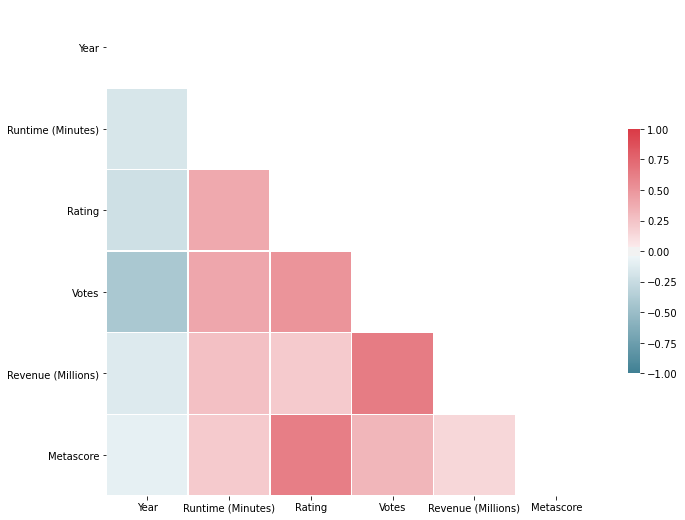

In [4]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
#movies released in each Year for different genres
df1 = pd.DataFrame(df, columns = ['Genre', 'Year'])

G = df['Genre']
Y = df['Year']

a = []
for i in set(G):
    for j in i.split(','):
        a.append(j)
g = set(a)
y = set(Y)

In [6]:
def no_of_movies_for_genre(gen):
    b = 0
    i = 1
    while i <=1000:
        for j in range(len(G[i].split(','))):
            if gen == G[i].split(',')[j]:
                b+=1
        i+=1
    return b

In [7]:
gen_count = []
for i in g:
    gen_count.append((no_of_movies_for_genre(i),i))
gen_count.sort(reverse = True)
f = []
for i in range(19):
    f.append(gen_count[i][1])

gen_yr =[]
for i in y:
    j = 1
    while j <= 1000:
        if Y[j] == i:
            gen_yr.append((i,G[j].split(',')))
        j += 1  

gen_in_yr = []
for x in y:
    s = []  
    for i in range(1000):
        if gen_yr[i][0] == x:
            for j in gen_yr[i][1]:
                s.append(j)
    gen_in_yr.append((x,s))
gen_in_yr.sort()

def data_count(yrnum):
    data = []
    input = gen_in_yr[yrnum][1]
    for i in f:
        data.append(input.count(i))
    return data 

d = {'Genre':f,
     '2006':data_count(0),
     '2007':data_count(1),
     '2008':data_count(2),
     '2009':data_count(3),
     '2010':data_count(4),
     '2011':data_count(5),
     '2012':data_count(6),
     '2013':data_count(7),
     '2014':data_count(8),
     '2015':data_count(9),
     '2016':data_count(10)}
df2 = pd.DataFrame(d,columns=['Genre','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])

In [8]:
df2

,Genre,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Drama,26,28,22,23,26,30,28,44,50,74,162
1,Action,11,12,24,14,25,20,21,29,37,35,75
2,Comedy,12,10,12,14,18,19,21,23,30,37,83
3,Adventure,13,11,11,18,23,18,18,22,30,33,62
4,Thriller,10,10,10,8,11,14,12,17,16,27,60
5,Crime,7,13,8,5,8,5,9,19,14,21,41
6,Romance,4,4,12,8,7,16,11,13,18,18,30
7,Sci-Fi,7,5,6,7,5,12,8,16,17,17,20
8,Horror,4,11,4,7,8,3,5,13,8,11,45
9,Mystery,8,7,4,8,8,8,5,13,13,12,20


# Number of movies of each Genre

In [9]:

Genre = df_me.Genre.str.split(',')
temp_genre = []
for sublist in Genre:
    for val in sublist:
        temp_genre.append(val)
genre_all = (np.unique(temp_genre, axis=0))

genre_number={}
for i in genre_all:
    genre_number[i]=0
    for sublist in Genre: 
        for val in sublist:
            if (i==val):
                genre_number[i]+=1
for i in genre_number.keys():
    print('The total number of movies with',i,'=',genre_number[i])

The total number of movies with Action = 303
The total number of movies with Adventure = 259
The total number of movies with Animation = 49
The total number of movies with Biography = 81
The total number of movies with Comedy = 279
The total number of movies with Crime = 150
The total number of movies with Drama = 513
The total number of movies with Family = 51
The total number of movies with Fantasy = 101
The total number of movies with History = 29
The total number of movies with Horror = 119
The total number of movies with Music = 16
The total number of movies with Musical = 5
The total number of movies with Mystery = 106
The total number of movies with Romance = 141
The total number of movies with Sci-Fi = 120
The total number of movies with Sport = 18
The total number of movies with Thriller = 195
The total number of movies with War = 13
The total number of movies with Western = 7


# For every Genre, we check if the critic ratings are related to public reviews

interactive(children=(Dropdown(description='gen', options=('Drama', 'Action', 'Comedy', 'Adventure', 'Thriller…

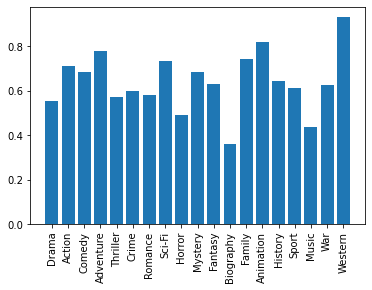

In [10]:
df5 = pd.DataFrame(df,columns = ['Director','Genre','Rating'])
df5.index.names=[None]

D = df5['Director']
R = df5['Rating']

def entgen(x):
    c = []
    i = 1
    while i <= 1000:
        for j in G[i].split(','):
            if j == x :
                c.append(i)
        i += 1
    return c

def ratesrt(x):
    c = []
    for i in entgen(x):
        c.append([R[i],D[i]])
    c.sort(reverse = True)
    return c

def co_rat_meta(gen):
    a = []
    b = []
    for i in entgen(gen):
        if np.isnan(df['Metascore'][i]) == False:
            a.append(df['Rating'][i])
            b.append(df['Metascore'][i])
    return np.corrcoef(np.array(a),np.array(b))[0][1]
interact(co_rat_meta,gen=f);       

corr_rat_meta =[]
for i in f:
    corr_rat_meta.append(co_rat_meta(i))
plt.bar(range(19),corr_rat_meta)
x = range(19)
plt.xticks(x,f,rotation=90);

## We see that biography, music, horror have low correlation

In [12]:
#For every Genre, number of movies released in a particular year and plots of runtime, revenue, votes and ratings.
def plot_genre(genre):
    df_temp = df['Genre'].str.contains(genre).fillna(False)
    print('The total number of movies with ',genre,'=',len(df[df_temp]))
    #f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='Year', data=df[df_temp], palette="Greens_d");
    plt.title(genre)
    compare_movies_rating = ['Runtime (Minutes)', 'Votes', "Revenue (Millions)", 'Metascore']
    for compare in compare_movies_rating:
        sns.jointplot(x='Rating', y=compare, data=df[df_temp], alpha=0.7, color='b', height=8)
        plt.title(genre)
    plt.show()
interact(plot_genre, genre=genre_all)

interactive(children=(Dropdown(description='genre', options=('Action', 'Adventure', 'Animation', 'Biography', …

<function __main__.plot_genre(genre)>

# Top 10 directors with highest average ratings

In [13]:
df.loc[(df.groupby('Director').count()['Rating']>1).tolist()].groupby('Director').mean()[['Rating']].nlargest(10,'Rating')

IndexError: Boolean index has wrong length: 644 instead of 1000

# Directors who have produced high rated movie in a particular Genre

In [14]:
def fame_4_gen(x):
    a = []
    b = []
    for i in range(len(ratesrt(x))):
        a.append(ratesrt(x)[i][1])
        b.append(ratesrt(x)[i][0])
    da = {'Director':a,'Rating':b}
    return pd.DataFrame(da).head()
interact(fame_4_gen,x=f);

interactive(children=(Dropdown(description='x', options=('Drama', 'Action', 'Comedy', 'Adventure', 'Thriller',…

In [15]:
df_me.nlargest(5,'Runtime (Minutes)')[['Director','Rating','Runtime (Minutes)']]

,Director,Rating,Runtime (Minutes)
Title,,,
Grindhouse,Robert Rodriguez,7.6,191
The Hateful Eight,Quentin Tarantino,7.8,187
The Wolf of Wall Street,Martin Scorsese,8.2,180
La vie d'Adèle,Abdellatif Kechiche,7.8,180
Inland Empire,David Lynch,7.0,180


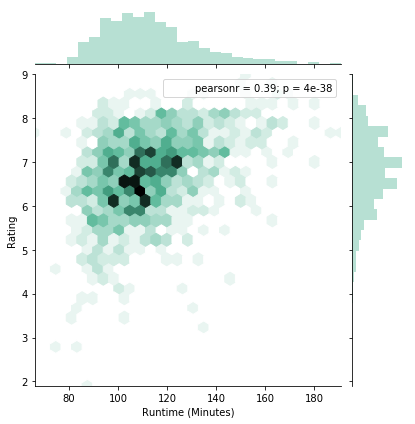

In [44]:
sns.jointplot(x="Runtime (Minutes)", y="Rating", kind="hex", color="#4CB391",data=df);

In [5]:
df_by_bo = df.sort_values(by="Revenue (Millions)", ascending=False, na_position='last')
df_by_bo.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


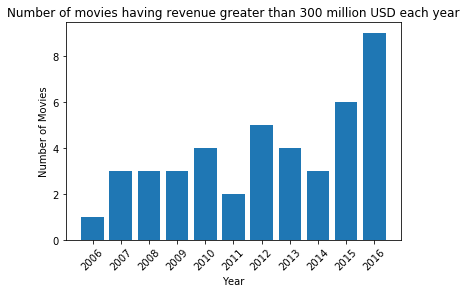

In [46]:
sample_years = np.sort(df.Year.unique())
high_grossers = []
for i in np.nditer(sample_years):
    j = len(df.loc[(df["Revenue (Millions)"]>300) & (df.Year==i)])
    high_grossers.append(j)
    
plt.bar(sample_years,high_grossers)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(sample_years, fontsize=10, rotation=45)
plt.title('Number of movies having revenue greater than 300 million USD each year')
plt.show()

correlation between high revenue making movies and ratings is better than with low revenue making movies

In [47]:
df_corr = df[df["Revenue (Millions)"]>=300]
df_corr["Revenue (Millions)"].corr(df_corr['Rating'])

0.35542290667642673

In [48]:
df_by_rating = df.sort_values(by='Rating',ascending=False)
df_by_rating

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


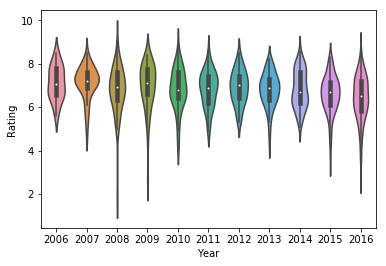

In [49]:
df_yearwise_rating=df[['Year','Rating']]
sns.violinplot(x="Year", y="Rating", data=df_yearwise_rating)

In [15]:
#
k = sorted(list(y))

def rat_avg(gen):
    a = []
    j = 2006
    while j<=2016:
        b = []
        for i in entgen(gen):
            if df['Year'][i] == j:
                b.append(df['Rating'][i])
        a.append(np.mean(b))
        j +=1
    plt.plot(a,'.')
    x = range(11)
    plt.xticks(x,k)
    plt.show()
interact(rat_avg,gen=f)

<function __main__.rat_avg(gen)>

## Average rating for all the genres decreases over the years

<function __main__.plot_norm(Type)>

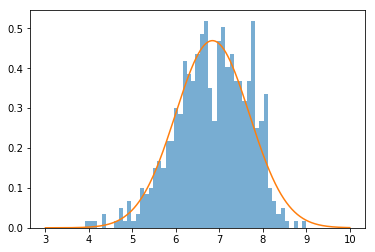

In [20]:
def plot_norm(Type):
    df_2=df[df["Revenue (Millions)"]>20]
    sigma=np.std(df_2[Type])
    nu = np.mean(df_2[Type])
    rv=norm(nu, sigma)
    if Type=='Rating':
        plt.hist(df_2[Type], bins=52,normed=True,  alpha = .60)
        x=np.linspace(3,10,1000)
    if Type == 'Metascore':
        plt.hist(df_2[Type], bins=20,normed=True, alpha = .60)
        x=np.linspace(10,100,1000)
    plt.plot(x,rv.pdf(x))
interact(plot_norm, Type=['Rating','Metascore'])

## Using regression ,we try to find formula for finding rating from revenue , metascore, runtime, genres and votes

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     8.426
Date:                Thu, 02 May 2019   Prob (F-statistic):           2.12e-94
Time:                        10:53:45   Log-Likelihood:                -553.41
No. Observations:                 838   AIC:                             1493.
Df Residuals:                     645   BIC:                             2406.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

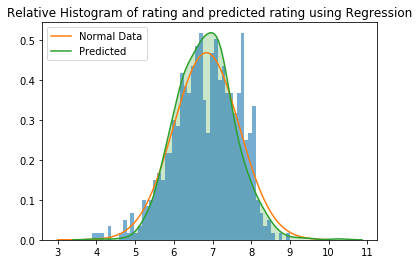

In [52]:
df_new=df.rename(columns={"Revenue (Millions)" : "Revenue", "Runtime (Minutes)":"Runtime"})
df_new['Genre'] = df_new['Genre'].astype('category')

results = smf.ols('Rating ~ Revenue + Metascore + Runtime + Genre + Votes', data= df_new).fit()
print(results.summary())

df_2=df[df["Revenue (Millions)"]>20]
Type='Rating'
sigma=np.std(df_2[Type])
nu = np.mean(df_2[Type])
rv=norm(nu, sigma)
if Type=='Rating':
    plt.hist(df_2[Type], bins=52, normed=True, alpha = .60)
    x=np.linspace(3,10,1000)
    
plt.plot(x,rv.pdf(x), label='Normal Data')
#plt.hist(results.predict(),bins=80, density= True)
sns.kdeplot(results.predict(), shade=True, label='Predicted')
plt.legend(loc='upper left')
plt.title('Relative Histogram of rating and predicted rating using Regression')